<a href="https://colab.research.google.com/github/Max-JI64/Kakao_Tech_Boost/blob/main/Daily_class/25_10_22_CNN_image.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf

# 데이터셋 불러오기

In [2]:
tf.keras.datasets.mnist

<module 'keras.datasets.mnist' from '/usr/local/lib/python3.12/dist-packages/keras/datasets/mnist/__init__.py'>

In [3]:
mnist = tf.keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [4]:
(x_train, y_train), (x_test, y_test) = mnist
x_train, x_test = x_train / 255.0, x_test / 255.0

In [5]:
x_train.shape, x_test.shape

((60000, 28, 28), (10000, 28, 28))

In [6]:
y_train.shape, y_test.shape

((60000,), (10000,))

# 이미지 출력

In [7]:
import numpy as np
np.set_printoptions(threshold=np.inf, linewidth=360) #데이터를 보는 옵션

In [8]:
x_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.

In [9]:
y_train[0]

np.uint8(5)

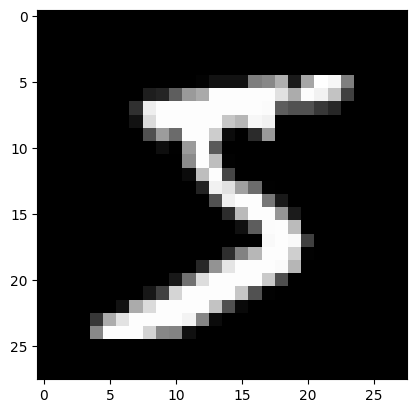

In [10]:
import matplotlib.pyplot as plt
plt.imshow(x_train[0], cmap="gray")

# 모델 생성

In [11]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28), name = "input_flatten"), #이미지 크기 : 28, 28
    tf.keras.layers.Dense(2, activation="relu", name="hidden_layer"), #은닉층 두개의 뉴런
    # tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, name="output_layer")
])
model.name="baseline_model"

model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "baseline_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_flatten (Flatten)         │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer (Dense)            │ (None, 2)              │         1,570 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 10)             │            30 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,600 (6.25 KB)

 Trainable params: 1,600 (6.25 KB)

 Non-trainable params: 0 (0.00 B)

In [12]:
print(f"Input Layer:{x_train[0].shape}")

for layer in model.layers:
    #훈련가능한 가중치라면
    if layer.get_weights():
        weights=layer.get_weights()
        print(f"\nLayer: {layer.name}")
        print(f"Weight matrix shape: {weights[0].shape}")
        print(f"Bias vector shape: {weights[1].shape}")
        print(f"Total parameters: {weights[0].shape[0]} * {weights[1].shape[0]} + {weights[1].size} = {weights[0].size + weights[1].size}")
        print(f"  - Weights: {weights[0].size}");
        print(f"  - Biases: {weights[1].size}")

Input Layer:(28, 28)

Layer: hidden_layer
Weight matrix shape: (784, 2)
Bias vector shape: (2,)
Total parameters: 784 * 2 + 2 = 1570
  - Weights: 1568
  - Biases: 2

Layer: output_layer
Weight matrix shape: (2, 10)
Bias vector shape: (10,)
Total parameters: 2 * 10 + 10 = 30
  - Weights: 20
  - Biases: 10


# 피드포워드 계산

In [13]:
predictions = model(x_train[:1]).numpy()
print(predictions)

[[-0.94117796 -0.78768104 -0.5323565   0.32286528  0.36400908 -0.6720927   0.30693218 -0.26066652 -0.87547857 -0.9570011 ]]


In [14]:
# Hidden layer (2개 뉴런 모두) 계산
input_flat = x_train[0].flatten()  # (784,)
W1 = model.layers[1].get_weights()[0]  # (784, 2)
b1 = model.layers[1].get_weights()[1]  # (2,)

# 행렬 곱셈: input @ weights + bias
hidden_output = np.dot(input_flat, W1) + b1  # (784,) @ (784,2) + (2,) = (2,)
print(f'MM: {input_flat.shape} @ {W1.shape} + {b1.shape} = {hidden_output.shape}')
print("Hidden layer output (before ReLU):", hidden_output)

# ReLU 활성화 함수 적용: max(0, x)
hidden_output_relu = np.maximum(0, hidden_output)  # (2,)
print("Hidden layer output (after ReLU):", hidden_output_relu)

MM: (784,) @ (784, 2) + (2,) = (2,)
Hidden layer output (before ReLU): [0.07197316 1.39709357]
Hidden layer output (after ReLU): [0.07197316 1.39709357]


In [15]:
# Output layer (10개 뉴런) 계산
W2 = model.layers[2].get_weights()[0]  # (2, 10)
b2 = model.layers[2].get_weights()[1]  # (10,)

# 행렬 곱셈: hidden @ weights + bias
output_logits = np.dot(hidden_output_relu, W2) + b2  # (2,) @ (2,10) + (10,) = (10,)
print(f'MM: {hidden_output.shape} @ {W2.shape} + {b2.shape} = {output_logits.shape}\n')
print("Output layer(logits):  ", output_logits)
print("model prediction:\t", model(x_train[0:1]).numpy()[0])

MM: (2,) @ (2, 10) + (10,) = (10,)

Output layer(logits):   [-0.94117803 -0.78768109 -0.53235648  0.3228653   0.36400909 -0.67209271  0.3069322  -0.26066652 -0.87547862 -0.95700113]
model prediction:	 [-0.94117796 -0.78768104 -0.5323565   0.32286528  0.36400908 -0.6720927   0.30693218 -0.26066652 -0.87547857 -0.9570011 ]


In [16]:
tf.nn.softmax(output_logits)

<tf.Tensor: shape=(10,), dtype=float64, numpy=array([0.05071342, 0.05912699, 0.07632589, 0.17951054, 0.18705033, 0.06637204, 0.17667304, 0.10015331, 0.05415715, 0.04991729])>

# 손실 계산 : 크로스엔트로피

In [17]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
loss_fn(y_train[-1:], predictions).numpy()

np.float32(2.9158654)

# 모델 컴파일

옵티마이저와 손실함수, 평가방식을 지정

In [18]:
model.compile(optimizer='adam',
              loss=loss_fn,
              metrics=['accuracy'])

In [19]:
history = model.fit(x_train, y_train, epochs=5, validation_split=0.2) #20%의 학습 데이터셋을 검증에 사용

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.2907 - loss: 1.9180 - val_accuracy: 0.4440 - val_loss: 1.4819
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.4573 - loss: 1.4524 - val_accuracy: 0.5415 - val_loss: 1.3049
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.5461 - loss: 1.2887 - val_accuracy: 0.5681 - val_loss: 1.2063
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.5862 - loss: 1.1972 - val_accuracy: 0.6547 - val_loss: 1.1063
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6515 - loss: 1.1096 - val_accuracy: 0.6614 - val_loss: 1.0538


평가 데이터셋의 손실과 정확도를 반환

In [20]:
model.evaluate(x_test,  y_test, verbose=2)

313/313 - 2s - 5ms/step - accuracy: 0.6587 - loss: 1.0879


[1.087925910949707, 0.6586999893188477]

기존 모델에 소프트맥스 추가  
기존엔 로짓을 출력, 이를 확률값으로 출력하도록 변환

In [21]:
probability_model = tf.keras.Sequential([
  model,
  tf.keras.layers.Softmax()
])

In [22]:
probability_model(x_test[:1]).numpy()

array([[0.00248645, 0.1670438 , 0.00257304, 0.00298721, 0.01398161, 0.00791775, 0.00168662, 0.67503476, 0.01915894, 0.10712972]], dtype=float32)

In [23]:
# 동일 입력
x_sample = x_test[:1]

# Method 1: model → softmax
out1 = model(x_sample)
prob_manual = tf.nn.softmax(out1).numpy()

# Method 2: probability_model (model + softmax)
prob_auto = probability_model(x_sample).numpy()

print("수동 softmax 결과:", prob_manual)
print("probability_model 결과:", prob_auto)
print("\n비교", np.allclose(prob_manual, prob_auto))
print("최대 차이:", np.abs(prob_manual - prob_auto).max())

수동 softmax 결과: [[0.00248645 0.1670438  0.00257304 0.00298721 0.01398161 0.00791775 0.00168662 0.67503476 0.01915894 0.10712972]]
probability_model 결과: [[0.00248645 0.1670438  0.00257304 0.00298721 0.01398161 0.00791775 0.00168662 0.67503476 0.01915894 0.10712972]]

비교 True
최대 차이: 0.0


In [24]:
pred_1 = model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


# 분류 평가

In [25]:
def evaluate_model(model, x_test, y_test, model_name="Model"):
    """
    분류 모델의 성능을 평가하고 시각화하는 함수

    Parameters:
    -----------
    model : keras.Model
        평가할 모델
    x_test : np.ndarray
        테스트 데이터
    y_test : np.ndarray
        테스트 레이블
    model_name : str
        모델 이름 (출력에 사용)

    Returns:
    --------
    dict : 평가 지표들 (accuracy, precision, recall, f1_score)
    """
    from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score, f1_score, accuracy_score
    import seaborn as sns
    import matplotlib.pyplot as plt

    # 예측
    y_pred = model.predict(x_test).argmax(axis=1)

    print(f"\n{'='*60}")
    print(f"{model_name} Evaluation Results")
    print(f"{'='*60}\n")

    # 1. Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=range(10), yticklabels=range(10))
    plt.title(f'{model_name} - Confusion Matrix')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

    # 2. Classification Report (per-class)
    print("\nPer-Class Metrics:")
    print("-" * 60)
    report = classification_report(y_test, y_pred,
                                   target_names=[f'Digit {i}' for i in range(10)])
    print(report)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step

Model 1 Evaluation Results



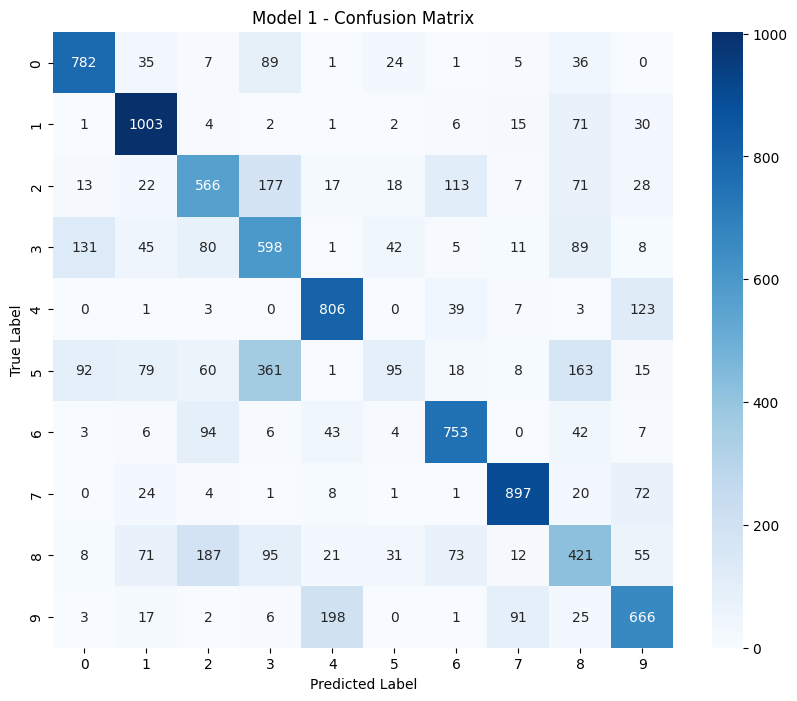


Per-Class Metrics:
------------------------------------------------------------
              precision    recall  f1-score   support

     Digit 0       0.76      0.80      0.78       980
     Digit 1       0.77      0.88      0.82      1135
     Digit 2       0.56      0.55      0.56      1032
     Digit 3       0.45      0.59      0.51      1010
     Digit 4       0.73      0.82      0.78       982
     Digit 5       0.44      0.11      0.17       892
     Digit 6       0.75      0.79      0.77       958
     Digit 7       0.85      0.87      0.86      1028
     Digit 8       0.45      0.43      0.44       974
     Digit 9       0.66      0.66      0.66      1009

    accuracy                           0.66     10000
   macro avg       0.64      0.65      0.63     10000
weighted avg       0.65      0.66      0.64     10000



In [26]:
# Model 1 평가
results_model1 = evaluate_model(model, x_test, y_test, model_name="Model 1")

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8450 - loss: 0.5329 - val_accuracy: 0.9534 - val_loss: 0.1623
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9504 - loss: 0.1674 - val_accuracy: 0.9634 - val_loss: 0.1236
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9635 - loss: 0.1199 - val_accuracy: 0.9671 - val_loss: 0.1064
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9715 - loss: 0.0947 - val_accuracy: 0.9716 - val_loss: 0.0930
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9764 - loss: 0.0790 - val_accuracy: 0.9734 - val_loss: 0.0870
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9798 - loss: 0.0673 - val_accuracy: 0.9742 - val_loss: 0.0878
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9812 - loss: 0.0582 - val_accuracy: 0.9751 - val_loss: 0.0867
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9839 - loss: 0.0502 - 

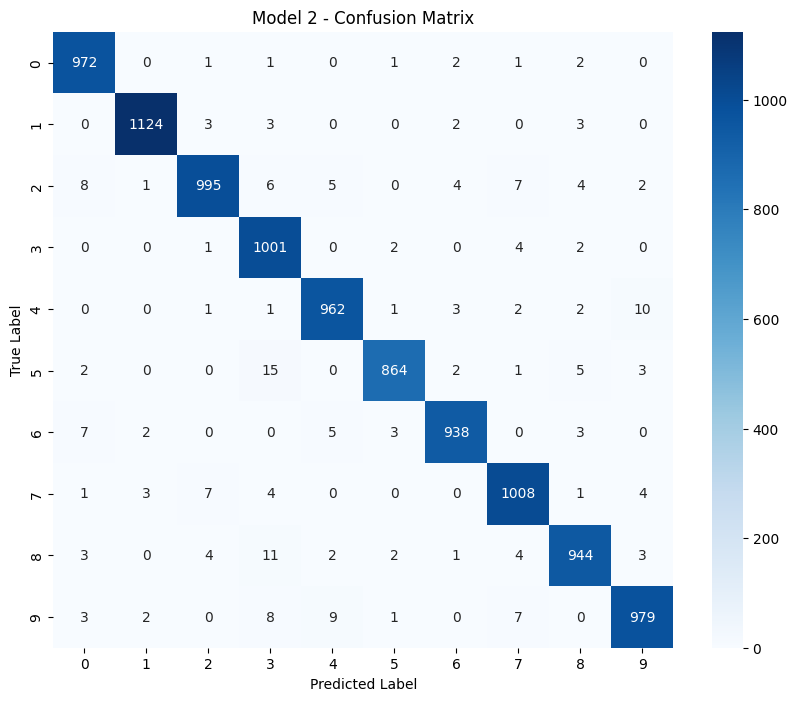


Per-Class Metrics:
------------------------------------------------------------
              precision    recall  f1-score   support

     Digit 0       0.98      0.99      0.98       980
     Digit 1       0.99      0.99      0.99      1135
     Digit 2       0.98      0.96      0.97      1032
     Digit 3       0.95      0.99      0.97      1010
     Digit 4       0.98      0.98      0.98       982
     Digit 5       0.99      0.97      0.98       892
     Digit 6       0.99      0.98      0.98       958
     Digit 7       0.97      0.98      0.98      1028
     Digit 8       0.98      0.97      0.97       974
     Digit 9       0.98      0.97      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



In [27]:
# Model 2
model2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10)
])

model2.compile(optimizer='adam',
                loss=loss_fn,
                metrics=['accuracy'])

history2 = model2.fit(x_train, y_train, epochs=10, validation_split=0.2)

results_model2 = evaluate_model(model2, x_test, y_test, model_name="Model 2")

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/reshape.py:39: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8818 - loss: 0.3832 - val_accuracy: 0.9824 - val_loss: 0.0621
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9829 - loss: 0.0553 - val_accuracy: 0.9835 - val_loss: 0.0563
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.9885 - loss: 0.0361 - val_accuracy: 0.9873 - val_loss: 0.0422
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9920 - loss: 0.0257 - val_accuracy: 0.9868 - val_loss: 0.0477
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9940 - loss: 0.0187 - val_accuracy: 0.9875 - val_loss: 0.0468
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9952 - loss: 0.0142 - val_accuracy: 0.9889 - val_loss: 0.0412
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9962 - loss: 0.0102 - val_accuracy: 0.9881 - val_loss: 0.0499
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9966 - loss: 0.0091 

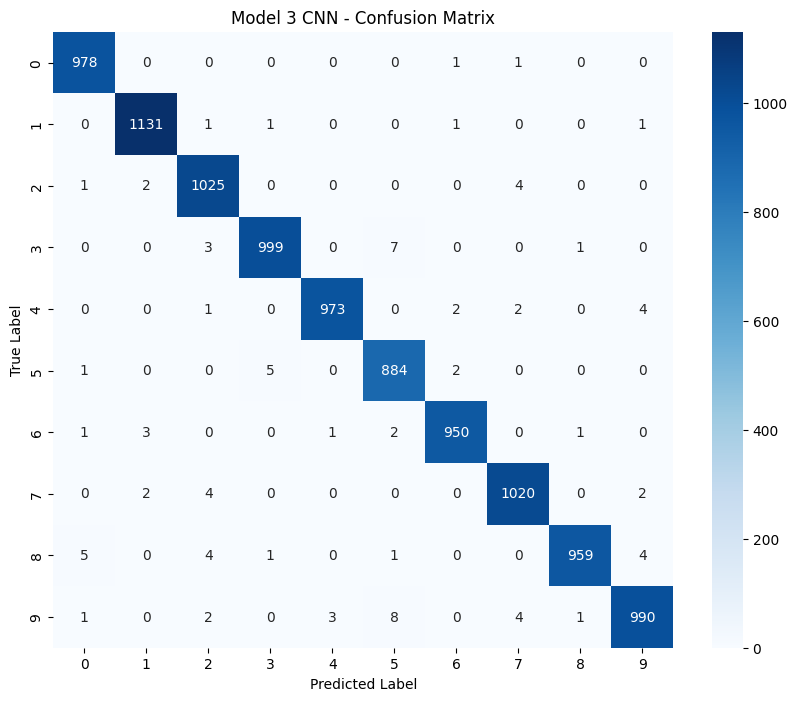


Per-Class Metrics:
------------------------------------------------------------
              precision    recall  f1-score   support

     Digit 0       0.99      1.00      0.99       980
     Digit 1       0.99      1.00      1.00      1135
     Digit 2       0.99      0.99      0.99      1032
     Digit 3       0.99      0.99      0.99      1010
     Digit 4       1.00      0.99      0.99       982
     Digit 5       0.98      0.99      0.99       892
     Digit 6       0.99      0.99      0.99       958
     Digit 7       0.99      0.99      0.99      1028
     Digit 8       1.00      0.98      0.99       974
     Digit 9       0.99      0.98      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [28]:
# model 3 CNN
model3 = tf.keras.Sequential([
    tf.keras.layers.Reshape((28, 28, 1), input_shape=(28, 28)),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10)
])

model3.compile(optimizer='adam',
                loss=loss_fn,
                metrics=['accuracy'])

history3 = model3.fit(x_train, y_train, epochs=10, validation_split=0.2)

evaluate_model(model3, x_test, y_test, model_name="Model 3 CNN")

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/reshape.py:39: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8454 - loss: 0.4774 - val_accuracy: 0.9790 - val_loss: 0.0688
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9760 - loss: 0.0785 - val_accuracy: 0.9871 - val_loss: 0.0436
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9838 - loss: 0.0560 - val_accuracy: 0.9852 - val_loss: 0.0501
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9869 - loss: 0.0416 - val_accuracy: 0.9895 - val_loss: 0.0376
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9895 - loss: 0.0354 - val_accuracy: 0.9891 - val_loss: 0.0364
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9910 - loss: 0.0277 - val_accuracy: 0.9886 - val_loss: 0.0447
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9919 - loss: 0.0248 - val_accuracy: 0.9887 - val_loss: 0.0384
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9932 - loss: 0.0187 -

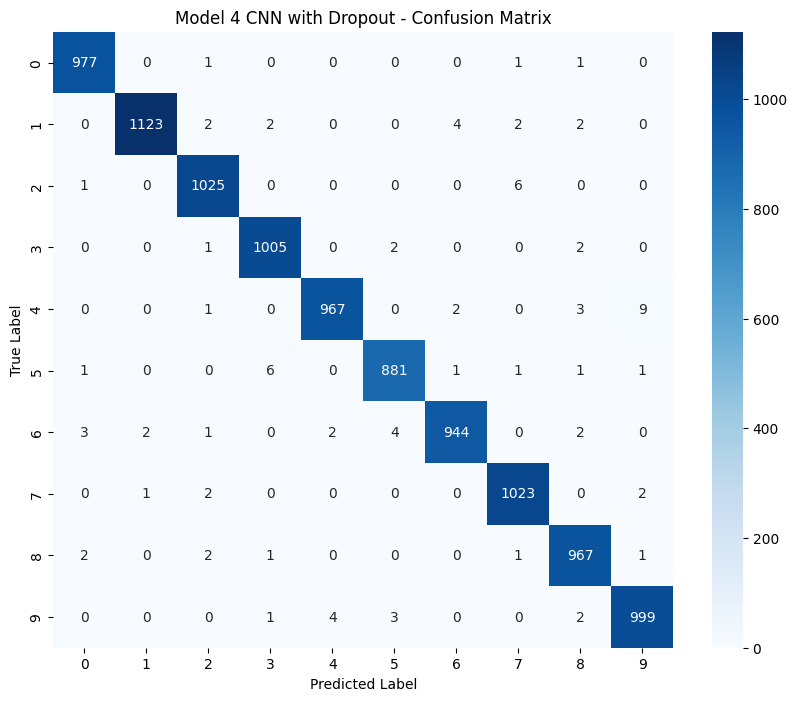


Per-Class Metrics:
------------------------------------------------------------
              precision    recall  f1-score   support

     Digit 0       0.99      1.00      0.99       980
     Digit 1       1.00      0.99      0.99      1135
     Digit 2       0.99      0.99      0.99      1032
     Digit 3       0.99      1.00      0.99      1010
     Digit 4       0.99      0.98      0.99       982
     Digit 5       0.99      0.99      0.99       892
     Digit 6       0.99      0.99      0.99       958
     Digit 7       0.99      1.00      0.99      1028
     Digit 8       0.99      0.99      0.99       974
     Digit 9       0.99      0.99      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [29]:
# model 4 CNN with dropout
model4 = tf.keras.Sequential([
    tf.keras.layers.Reshape((28, 28, 1), input_shape=(28, 28)),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10)
])

model4.compile(optimizer='adam',
                loss=loss_fn,
                metrics=['accuracy'])

model4.fit(x_train, y_train, epochs=10, validation_split=0.2)

evaluate_model(model4, x_test, y_test, model_name="Model 4 CNN with Dropout")

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/reshape.py:39: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9305 - loss: 0.2373 - val_accuracy: 0.9821 - val_loss: 0.0557
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9852 - loss: 0.0462 - val_accuracy: 0.9826 - val_loss: 0.0571
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9896 - loss: 0.0323 - val_accuracy: 0.9897 - val_loss: 0.0354
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9936 - loss: 0.0228 - val_accuracy: 0.9876 - val_loss: 0.0408
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9934 - loss: 0.0194 - val_accuracy: 0.9892 - val_loss: 0.0399
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9954 - loss: 0.0146 - val_accuracy: 0.9906 - val_loss: 0.0345
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9959 - loss: 0.0136 - val_accuracy: 0.9841 - val_loss: 0.0908
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9969 - loss: 0.0104 -

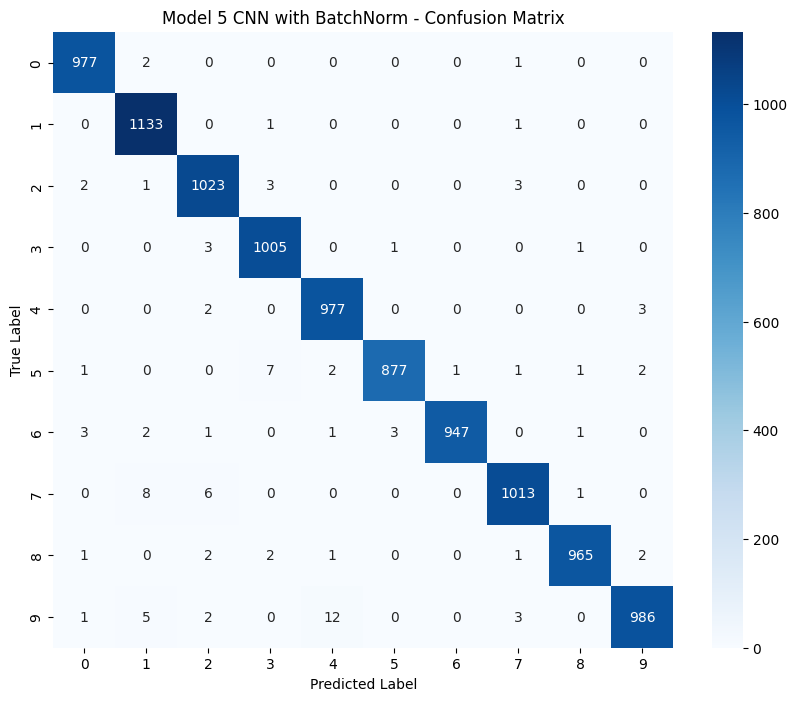


Per-Class Metrics:
------------------------------------------------------------
              precision    recall  f1-score   support

     Digit 0       0.99      1.00      0.99       980
     Digit 1       0.98      1.00      0.99      1135
     Digit 2       0.98      0.99      0.99      1032
     Digit 3       0.99      1.00      0.99      1010
     Digit 4       0.98      0.99      0.99       982
     Digit 5       1.00      0.98      0.99       892
     Digit 6       1.00      0.99      0.99       958
     Digit 7       0.99      0.99      0.99      1028
     Digit 8       1.00      0.99      0.99       974
     Digit 9       0.99      0.98      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [30]:
# batch normalization
model5 = tf.keras.Sequential([
    tf.keras.layers.Reshape((28, 28, 1), input_shape=(28, 28)),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(10)
])

model5.compile(optimizer='adam',
                loss=loss_fn,
                metrics=['accuracy'])

history5 = model5.fit(x_train, y_train, epochs=10, validation_split=0.2)

evaluate_model(model5, x_test, y_test, model_name="Model 5 CNN with BatchNorm")